## Real Estate Agency


* Student name:

- Beatrice Kariuki   - Lead

- Rodgers Odhiambo

- Mohamed Ali

- Ahmed HAJI

- Peter Muhia

- Emmanuellar Karisa

* Student pace:  part time 
* Instructor name: Sam Jane



![awesome](https://images.unsplash.com/photo-1560518883-ce09059eeffa?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8aG91c2UlMjByZW50YWx8ZW58MHx8MHx8fDA%3D)

## 1.0 BUSINESS UNDESTARNDING

# 1.1 Overview
The primary goal of the project is to build a predictive model that can estimate/predict the house prices in King County, Washington ,USA based on its features,provide valuable insights through comparative market analysis in order to facilitate informed decision making. The target audience includes real estate analysts,real estate investors,data scientists,machine learning practioners,financial institutions,potential home buyers and potential tenants. The dataset used is the King County House dataset accessible from Download File

## 1.2 PROBLEM STATEMENT
The real estate industry is constantly changing due to social, economic, and technological developments. As such, new challenges are presented each day. It is important to stay informed of these changes,create strategies that address the current issues and also have an understanding of the core principles that drive successful sales.A solid pricing strategy backed up by data and market knowledge are among the most important factors to take into consideration.Some of the challenges in the industry include;

1.Runaway inflation, high interest rates, bank stress and tightening liquidity. This, compounded by fluctuating demand as a
result of inflation income effect that is constraining consumer purchasing power, is having a negative toll on investment earnings in the area.

2.The ever increasing competition which makes standing out and capturing the attention of potential leads can be a challenging endeavor. Leads can be elusive, as many people are cautious about sharing their contact information or engaging with real estate agents.

3.Pricing Properties - Setting the right price for a property from the beginning can determine whether it sells quickly and profitably or sits unsold for an extended period.This highlights the crucial importance of precise property pricing in the real estate sector.

4.Demographics - Change in demographics can have a significant impact on the real estate industry. Shifting population characteristics, such as age, income, and household composition, influence the types of properties in demand, preferred locations, and overall market trends e.g an aging population might lead to increased demand for retirement communities or homes with accessibility features.

The key stakeholders who play a vital role in the real estate industry are ;

- Real estate analysts - Help in providing valuable insights and analysis to support decision-making processes.
- Real estate investors - Individuals or institutions who invest in real estate for the purpose of generating income.
- Real estate agents - facilitate property transactions between buyers and sellers.
- Financial institutions - b.anks,morgage companies.
- Potential home buyers and potential tenants - indivuduals/companies looking to buy or sell their properties.
- Government - Regulates the real estate industry through zoning laws, building standards and other regulations.
- Real Estate Appriasers - Determine the value of a property based on various factors,helping buyers and lenders assess its worth.

# 1.3 OBJECTIVES
- To evaluate factors that affect saleprice of houses.
- What combinations of features is best fit for price predictions.


# 1.4 Data Understanding
For this project, we will be using the King County House Sales dataset, which contains information about house sales in a northwestern county. The dataset includes various features such as the number of bedrooms, bathrooms, living area size, condition of the house, presence of additional amenities, and more.

The dataset has 20 columns and over 21500 records, covering house sales between May 2014 and May 2015. The data is suitable for the project because it provide relevant information about the features that affect the house prices in King County. The dataset was obtained from GitHub.

The King County House Sales dataset contains the following columns;

- Price - Sale price (prediction target),
- bedrooms - Number of bedrooms,
- bathrooms - Number of bathrooms,
- sqft_living - Square footage of living space in the home,
- sqft_lot - Square footage of the lot,
- floors - Number of floors (levels) in house,
- view - Quality of view from house,
- condition - How good the overall condition of the house is. Related to maintenance of house,
- grade - Overall grade of the house. Related to the construction and design of the house,
- sqft_above - Square footage of house apart from basement,
- sqft_basement - Square footage of the basement,
- yr_built - Year when house was built,
- yr_renovated - Year when house was renovated,
- zipcode - ZIP Code used by the United States Postal Service,
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors,
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors, and
- sell_yr - Date house was sold.

For our analysis we decided to choose the following columns price,bedrooms,bathrooms,sqft_living	condition,yr_built,sell_yr and house_age of which are expected to have an impact on the price of the house.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#Loading data
house_df=pd.read_csv('kc_house.csv')
pd.set_option("display.max_columns",None)

house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/09/2014,538000,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/09/2014,604000,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#checking null values
house_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
#checking on data information
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#cheking on data description
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## DATA PREPARATION

In [6]:
#droping unnecessary columns
house_df.drop(columns=['id','lat','long','sqft_lot','floors','waterfront','view','zipcode','sqft_living15','sqft_lot15','grade','yr_renovated','sqft_above','sqft_basement'],inplace=True)
house_df.head()

,date,price,bedrooms,bathrooms,sqft_living,condition,yr_built
0,10/13/2014,221900,3,1.00,1180,Average,1955
1,12/09/2014,538000,3,2.25,2570,Average,1951
2,2/25/2015,180000,2,1.00,770,Average,1933
3,12/09/2014,604000,4,3.00,1960,Very Good,1965
4,2/18/2015,510000,3,2.00,1680,Average,1987


In [7]:
#checking for duplicates
has_duplicates = house_df.duplicated().any()
print("Has duplicates:", has_duplicates)

Has duplicates: True


In [8]:
#checking for for null values
house_df.isna().sum()

date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
condition      0
yr_built       0
dtype: int64

## Feature engineering 
it involves creating new features or transforming existing ones to enhance the performance of a statistical model

In [9]:
#converting date to datetime format
house_df['date']=pd.to_datetime(house_df['date'])
#extracting year from date column
house_df.date=house_df['date'].dt.year

# Creating a new column for sell year
house_df['sell_yr'] = pd.to_datetime(house_df['date'],format='%Y').dt.year
house_df.drop(columns='date', inplace=True)

In [10]:
#finding house age at year of sale
house_df['house_age']=house_df['sell_yr']-house_df['yr_built']


In [13]:
#transformation of 'condition'categorical values.
house_df['condition'].replace(to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], value=[1, 2, 3, 4, 5], inplace=True)

In [14]:
house_df.head()

,price,bedrooms,bathrooms,sqft_living,condition,yr_built,sell_yr,house_age
0,221900,3,1.00,1180,3,1955,2014,59
1,538000,3,2.25,2570,3,1951,2014,63
2,180000,2,1.00,770,3,1933,2015,82
3,604000,4,3.00,1960,5,1965,2014,49
4,510000,3,2.00,1680,3,1987,2015,28


# EXPLANATORY DATA ANALYSIS
In this section, we will perform exploratory data analysis (EDA) to understand the data better and discover any patterns, trends using univariate,bivariate and multivariate analysis

We will use descriptive statistics and visualizations to summarize the main characteristics of the data and examine the relationships between the features and the target variable.

We will also check the distribution and correlation of the variables and identify any potential problems or opportunities for the analysis.



# Univariate Analysis
- Univariate analysis involves the examination of single variables.We focus in the summary statistics of target variable-price to help us undersatand the distribution and skewness of house prices

Basic Statistics of Price:
 count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


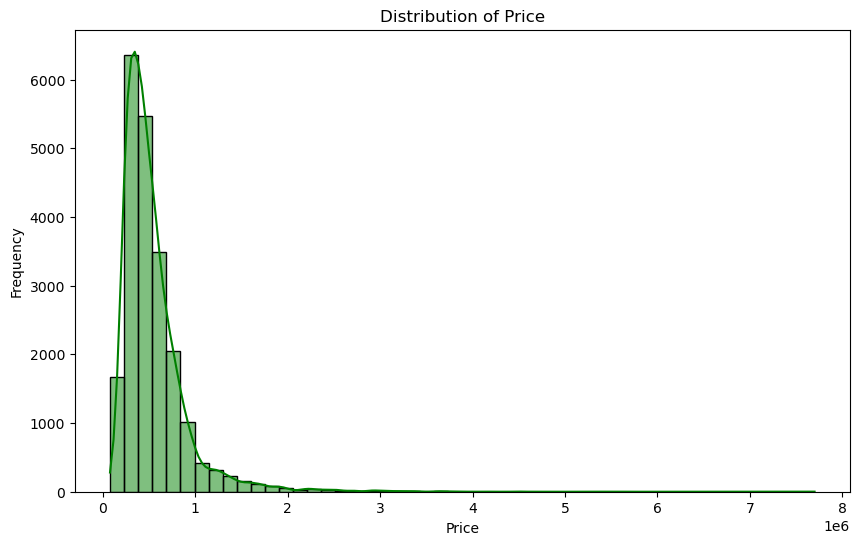

In [15]:
# Display summary statistics of the 'price' variable
price_stats = house_df['price'].describe()
print("Basic Statistics of Price:\n", price_stats)

# Visualizing the distribution of 'price' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(house_df['price'], bins=50, kde=True, color='green')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



- The histogram shows that the distribution of house price is positively skewed suggesting that while most houses are concentrated around lower to mid-range prices, there are some properties with significantly higher prices.

- The summary statistics provides more details on distribution of price.The average house price is approximately USD 438,010.1,the maximum and minimum price indicates USD 1,120,000 and  82,000 respectively.The standard deviation is USD 180,238.9 indicates that the prices have a notable amount variability around the mean.

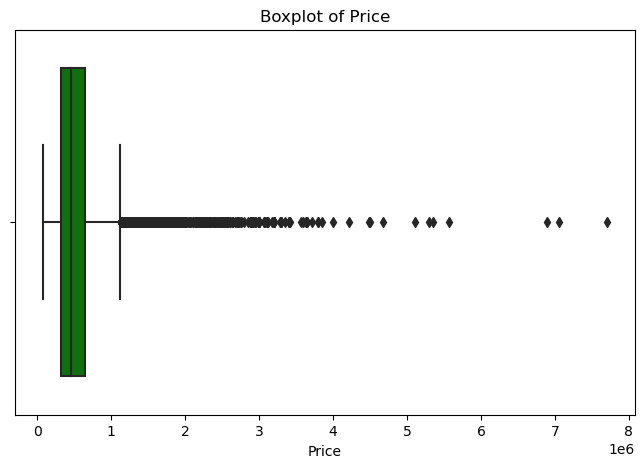

In [16]:
# Visualize the boxplot of 'price' to identify outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=house_df['price'], color='green')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

- The box plot confirms the pice is  positively skewed as indicated by longer right tail the points beyond whiskers suggests the existence of potential outliers
- The median line closer to the lower edge of the box is consintent with positively skewed distribution showing that majority of prices are concentrated towards the lower end with fewer houses having higher prices

# Bivariate Analysis

In this section, we will perform bivariate analysis to examine the relationship between the target variable - price and the other numeric and continuous features in the data. We will use scatter plots to show the direction, strength, and shape of the relationship between two numeric variables. This will help us understand how one variable affects or is affected by another variable and identify any patterns or trends that may exist.

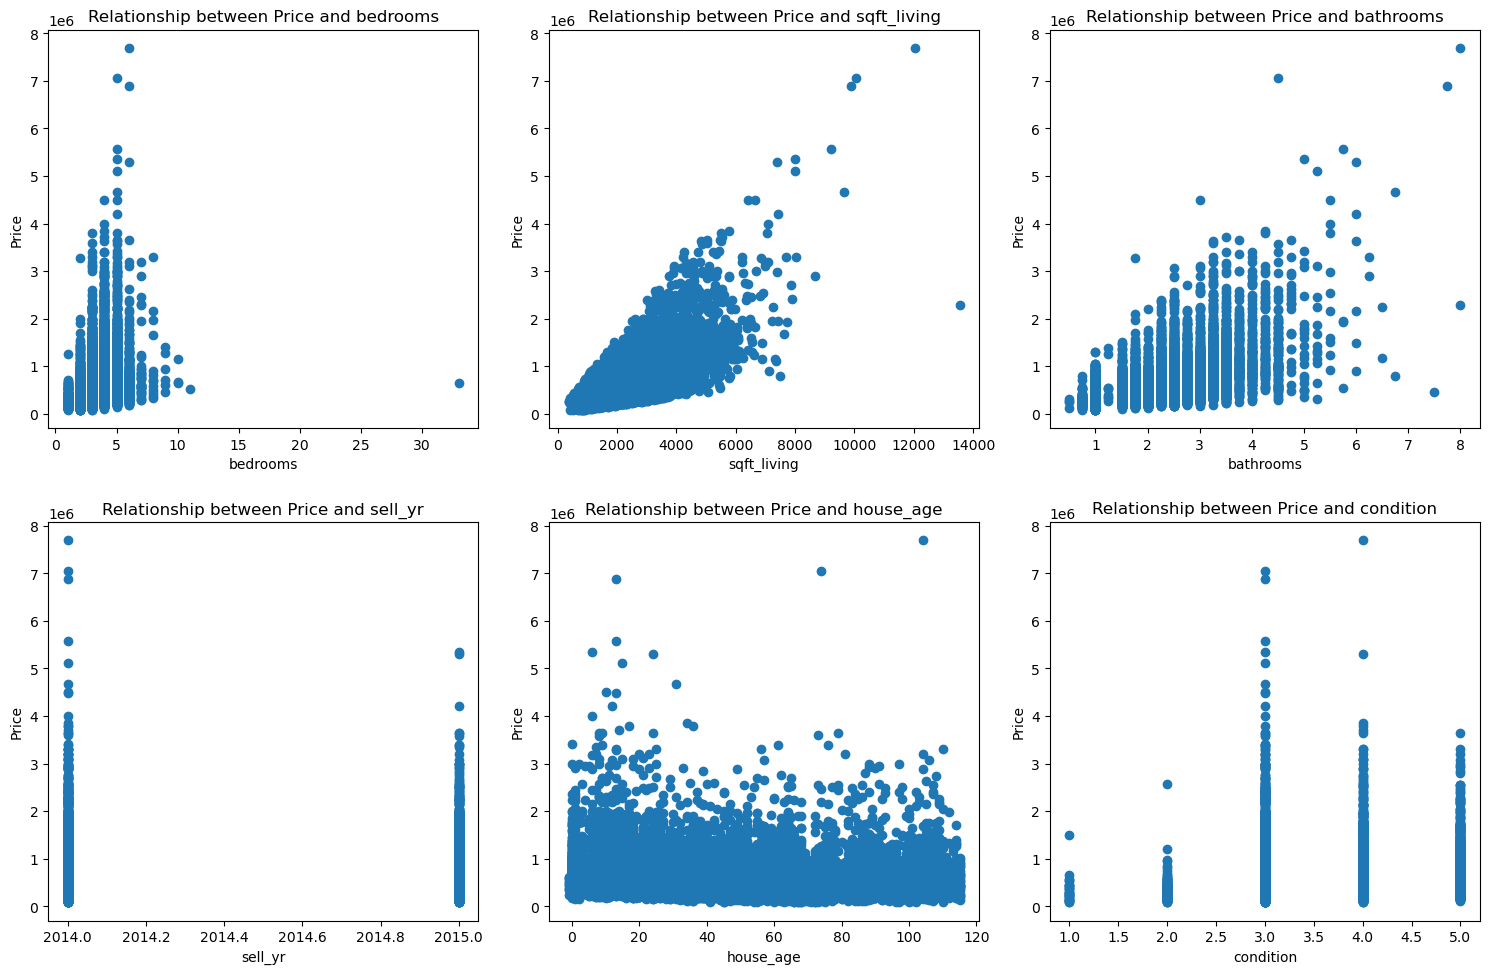

In [17]:
#relationships between our target variable and other independent variables in the dataset
variables = ['bedrooms','sqft_living','bathrooms','sell_yr','house_age','condition']
num_rows = math.ceil(len(variables) / 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(house_df[var], house_df['price'])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Price')
    axes[row, col].set_title(f'Relationship between Price and {var}')

plt.tight_layout()
plt.show()

In [18]:
house_df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

- The scatter plots show that there is a positive relationship between most of the independent variables and the price of a house. This means that houses with higher values for these variables tend to be more expensive

# Multivariate

In this section, we will perform multivariate analysis to examine the relationship between the target variable - price and multiple features in the data. We will use heatmap to visualize the correlation matrix of the features and see how they are related to each other and to the price.

A heatmap can show us the strength and direction of the correlation between two variables using different colors and shades. This will help us identify the most important features for the prediction and avoid multicollinearity problems.

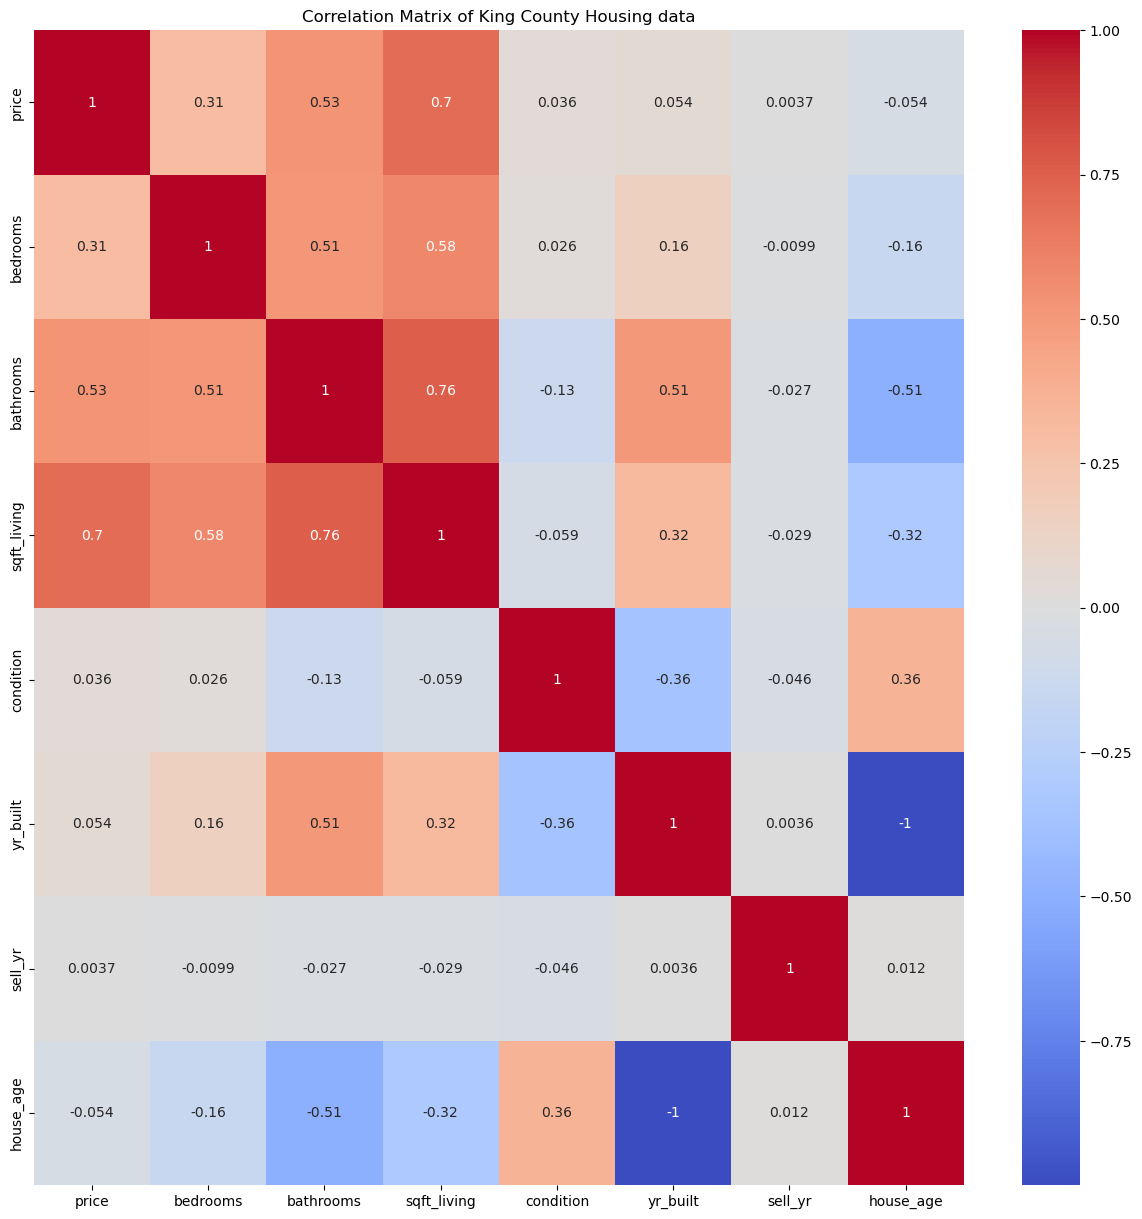

In [19]:
plt.figure(figsize=(15, 15))
sns.heatmap(house_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of King County Housing data')
plt.show()

- Positive correlations are typically represented by shades of red, and negative correlations by shades of blue.

# Modeling

In this section, we will build and evaluate both simple linear and multiple linear statistical models for the house price using the features we have selected and prepared in the previous sections. We will use linear regression to fit the models and compare their performance.We will evaluate to see whether our model is statistically significant.We will also use metrics such as mean absolute error (MAE), root mean squared error (RMSE),R-squared (R2) and Adj R-squared to measure the accuracy and goodness of fit of the models.

Our linear regression model is based on the following assumptions
- Linearity: The relationship between the independent variables and the dependent variable is linear.
- Homoscedasticity: The variance of residual is the same for any value of X.

## Simple linear regression

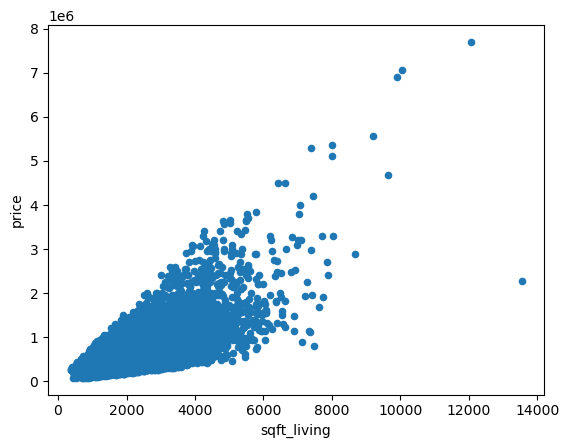

In [20]:
#Relationship between our target variable 'price' and 'sqft_living'
house_df.plot.scatter(x='sqft_living',y='price');

- The graph depicts a linear relationship with the positive gradient.

### Baseline model

In [21]:
import statsmodels.api as sm
y = house_df["price"]
X_baseline = house_df[["sqft_living"]]

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:12:11   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

In [22]:
baseline_results.params

const         -43988.892194
sqft_living      280.863014
dtype: float64

### Evaluating and interpreting the results
- The R-squared of 0.493 indicates that sqft_living explains 49.3% of the variation in  price. 


- The coefficient estimates show the relationship between the independent variable (sqft_living) and the dependent variable (price).The constant coefficient  is -43988.892194 representing the estimated price when sqft-living is zero.The coefficient of sqft_living shows that a unit increase in sqft_living is associated with an increase in price by approximately 280.863014.  


- The p-values (P>|t|) associated with the coefficients determine their statistical significance. In this case, both the const and sqft_living coefficients have p-values of 0.000, indicating that the linear relationship is statistically significant.


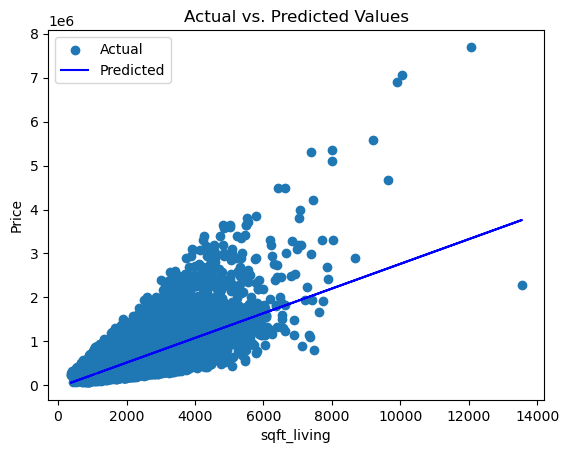

In [23]:
#Visualizaton
#fit the simple linear regression model
y = house_df["price"]
X_baseline = house_df["sqft_living"]

# Addinding a constant term to the independent variable matrix
X_baseline = sm.add_constant(X_baseline)

# Creating and fitting the baseline model
baseline_model = sm.OLS(y, X_baseline)
baseline_results = baseline_model.fit()

# Visualize the linearity
plt.scatter(X_baseline['sqft_living'], y, label='Actual')  # Scatter plot of actual values
plt.plot(X_baseline['sqft_living'], baseline_results.predict(), color='blue', label='Predicted')  # Line plot of predicted values
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

 ###### ploting_fit version of model fit

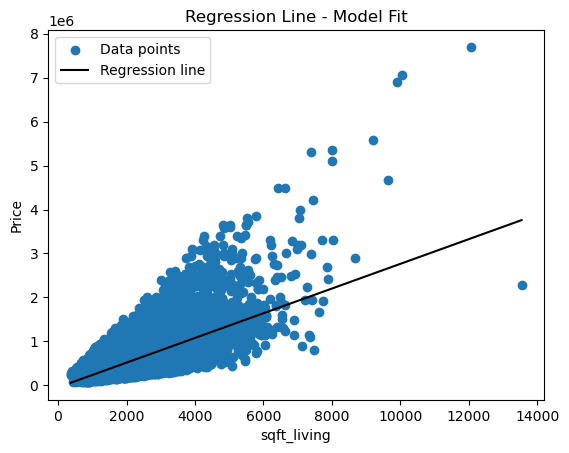

In [24]:
#visualizing the regression line to show model fit
#Scatter plot of data points
plt.scatter(house_df["sqft_living"], house_df["price"], label="Data points")

# Regression line
x = np.linspace(house_df["sqft_living"].min(), house_df["sqft_living"].max(), 100)
y = baseline_results.params[0] + baseline_results.params[1] * x
plt.plot(x, y, color="black", label="Regression line")

plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.title("Regression Line - Model Fit")
plt.legend()
plt.show()

The plot helps to assess the linearity of the relationship between the house price and the square footage of living space.the model shows how well linear regression model fits the data.

##### Ploting the model residuals

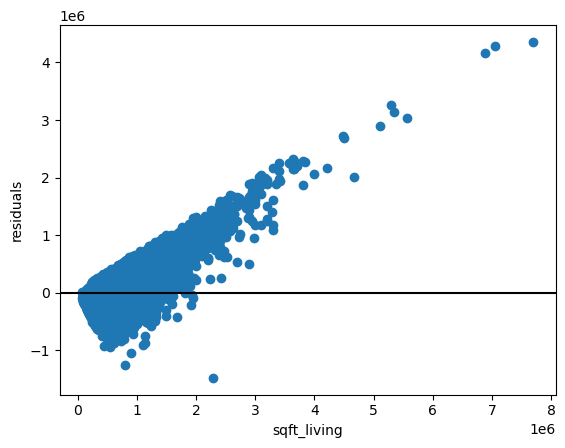

In [25]:
#checking for homoscedasticity 
#residuals for predicted values, 
fig, ax = plt.subplots()

ax.scatter(house_df["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals"); 

- The residuals exhibit homoscedasticity, meaning that the distribution of the residuals doesn't vary much based on the value of sqft_living

- Spread of residuals is constant along the predicted values.

### Multiple Linear regression
Here we use multiple linear regression to predict house price from more than one feature. Multiple linear regression models the linear relationship between a dependent variable and two or more independent variables

###### Checking for multicollinearity among the features

In [26]:
corr = house_df.corr().abs()

Multicollinear_Features = []
Multicollinear_Corr = []

# Function to check multicollinearity for a given feature
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].items():
        if correlation >= 0.75 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)

# Iterate over features in the correlation matrix
for feature in corr.columns:
    check_multicollinearity(feature)

# Creating a DataFrame with multicollinearity information
MC_df = pd.DataFrame({'Correlations': Multicollinear_Corr, 'Features': Multicollinear_Features})
MC_df = MC_df.sort_values(by='Correlations', ascending=False)


print(MC_df)

   Correlations                  Features
2      0.999873     [yr_built, house_age]
3      0.999873     [house_age, yr_built]
0      0.755758  [bathrooms, sqft_living]
1      0.755758  [sqft_living, bathrooms]


#### Building a Multiple Linear Regression Model


In [27]:
# defining dependent and independent variables
y = house_df["price"]
X = house_df[['bedrooms','sqft_living','bathrooms','house_age','condition']]

#building the model 
#X_baseline_model=sm.OLS(y,sm.add_constant(X_baseline)) 
#results=X_baseline_model.fit()
#print(results.summary())

In [28]:
#Add a constant
X = sm.add_constant(X)
X.head()

,const,bedrooms,sqft_living,bathrooms,house_age,condition
0,1.0,3,1180,1.00,59,3
1,1.0,3,2570,2.25,63,3
2,1.0,2,770,1.00,82,3
3,1.0,4,1960,3.00,49,5
4,1.0,3,1680,2.00,28,3


In [29]:
#Training and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [30]:
#Multilinear regression
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     4204.
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:12:13   Log-Likelihood:            -2.3885e+05
No. Observations:               17277   AIC:                         4.777e+05
Df Residuals:                   17271   BIC:                         4.778e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.89e+05   1.27e+04    -14.893      

In [31]:
# Making predictions on the test data
predictions = model.predict(X_test)
predictions[:4]

9864     471638.813315
8825     403869.575181
4561     633631.925406
12942    349870.407304
dtype: float64

In [32]:
#Accuracy Assesment
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE:', round(mean_absolute_error(y_test, predictions)))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, predictions)),1))

MAE: 163483
RMSE: 253518.9


####  Interpreting the results
- R-squared is 0.549, indicating that approximately 54.9% of the variability in housing prices is explained by the model.

- A higher F-statistic with a low probability value (Prob (F-statistic)) suggests that the model is statistically significant.

- The const coefficient is -1.89e+05, suggesting the baseline price when all other predictors are zero.
- The bedrooms coefficient is -6.899e+04, indicating that, on average, each additional bedroom is associated with a decrease in price.
- The sqft_living coefficient is 296.3584, suggesting that an increase in square footage is associated with an increase in price.
- The bathrooms coefficient is 8.258e+04, implying that more bathrooms are associated with higher prices.
- The house_age coefficient is 2885.7617, suggesting that newer houses tend to have higher prices.
- The condition coefficient is 1.358e+04, indicating that better house condition is associated with higher prices

#### Evaluating the model

 Evaluating our model to fit the assumptions of linear regression

In [33]:
#log transforming sqft_living
house_df['sqft_living'] = np.log(house_df['sqft_living'])

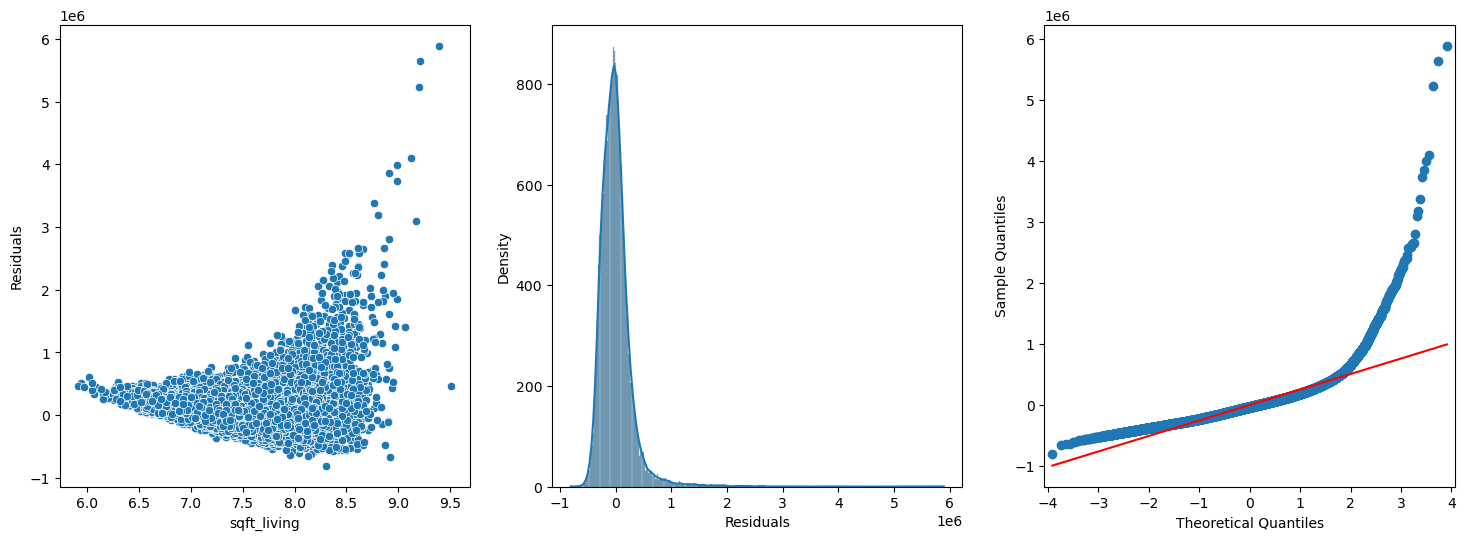

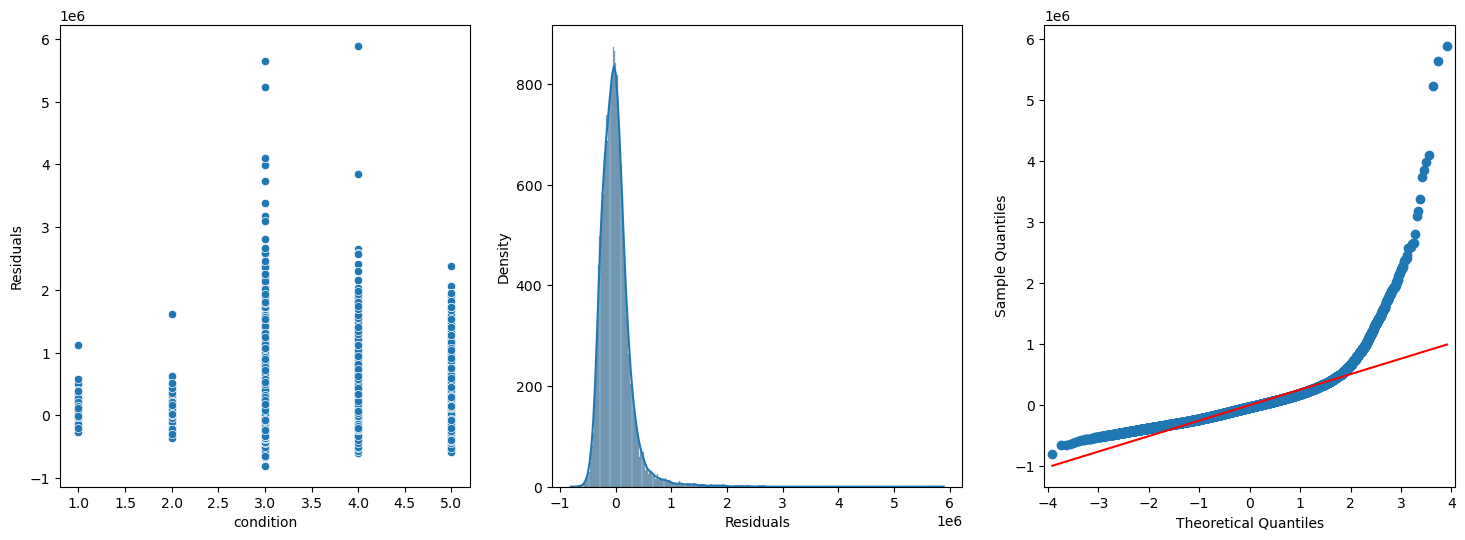

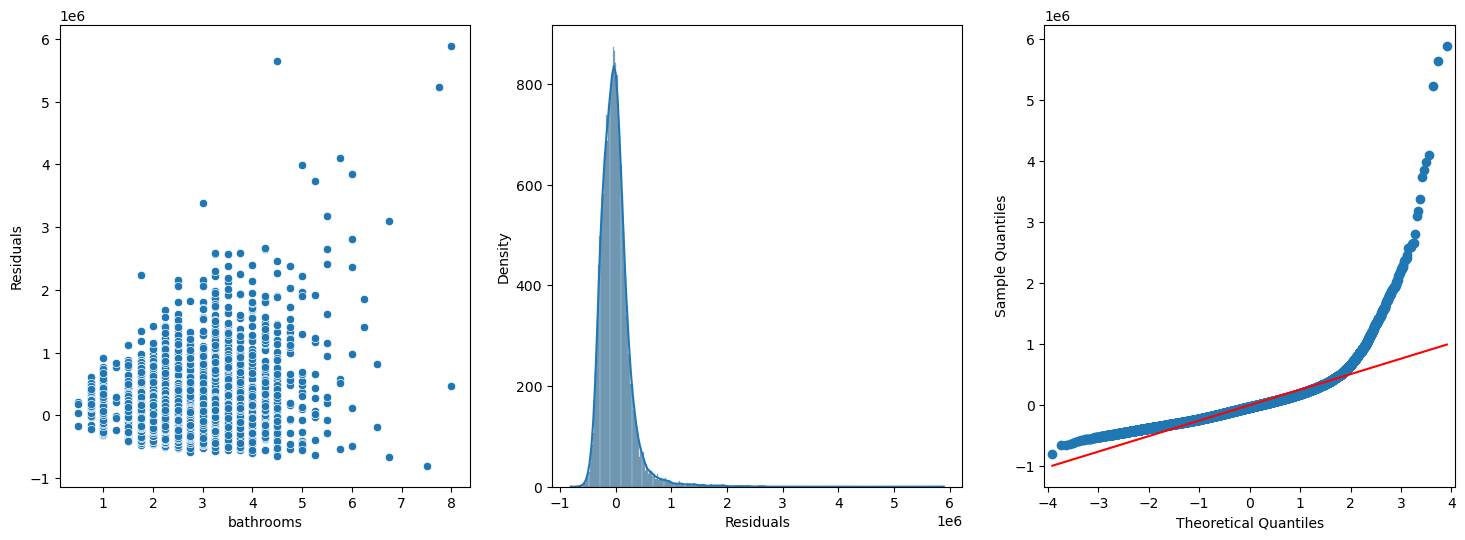

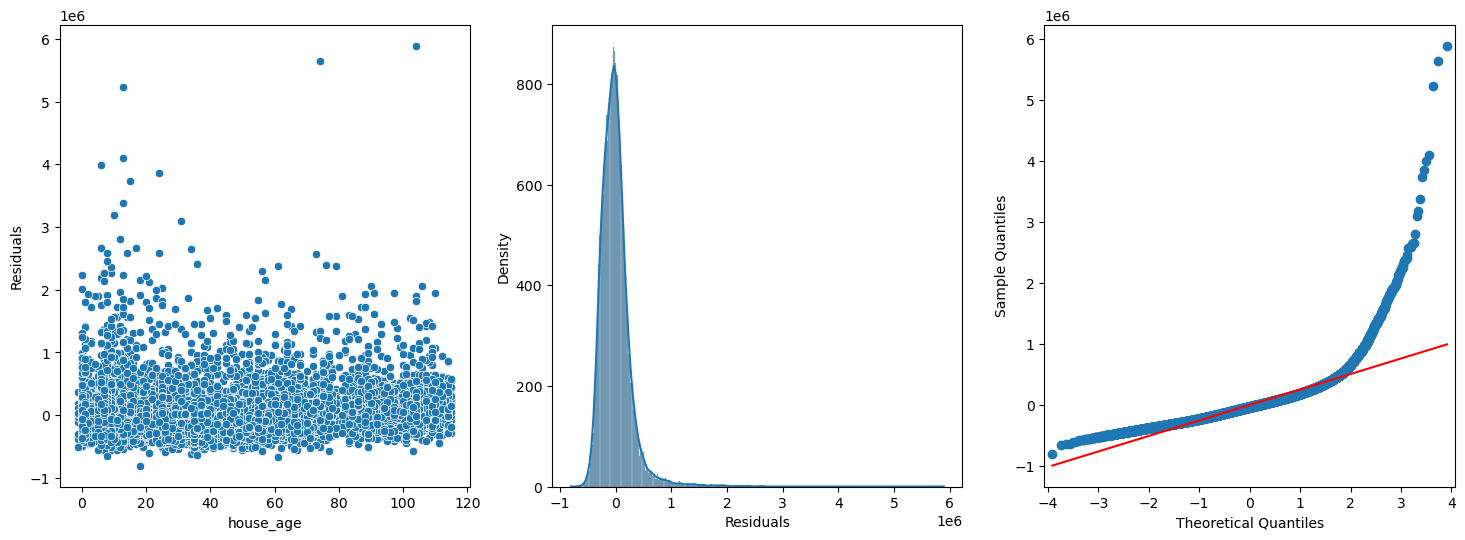

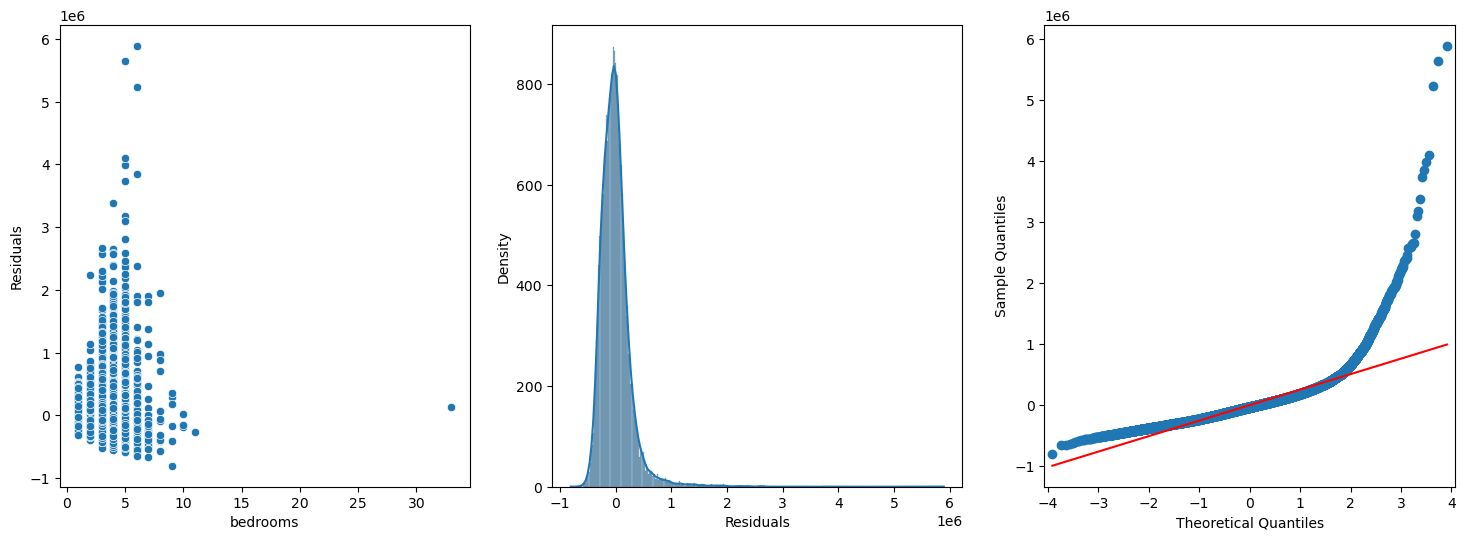

In [35]:
# Perform model diagnostics for our independent variables
def model_diagnostic(model, x, x_name, y):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sns.scatterplot(x=x, y=model.resid, ax=axes[0])
    axes[0].set_xlabel(x_name)
    axes[0].set_ylabel('Residuals')
    sns.histplot(model.resid, kde=True, ax=axes[1])
    axes[1].set_xlabel('Residuals')
    axes[1].set_ylabel('Density')
    sm.qqplot(model.resid, line='r', ax=axes[2])
    axes[2].set_xlabel('Theoretical Quantiles')
    axes[2].set_ylabel('Sample Quantiles')
    plt.show()
model_3 = sm.OLS(house_df['price'], sm.add_constant(house_df[['sqft_living', 'condition', 'bathrooms']])).fit()
model_diagnostic(model_3, house_df['sqft_living'], 'sqft_living', house_df['price'])
model_diagnostic(model_3, house_df['condition'], 'condition', house_df['price'])
model_diagnostic(model_3, house_df['bathrooms'], 'bathrooms', house_df['price'])
model_diagnostic(model_3, house_df['house_age'], 'house_age', house_df['price'])
model_diagnostic(model_3, house_df['bedrooms'], 'bedrooms', house_df['price'])

- The four independent variables 'sqft_living', 'condition', 'bathrooms' ,'house_age','bedrooms' pass the assumptions for regression that is normality, homoscedasticity and linearity

#### Results for model

- The Adj R-squared value of 54% indicates that Model can account for about 54% of the variability in the price of a house. This means that the model is able to explain a significant amount of the variation in house prices, but there are still other factors that are not accounted for.
- The RMSE value suggests that, on average, the model's predictions deviate by approximately by 253,518.9 USD from the true prices.However lower RMSE are desiarable for better model accuracy.


#### Recommendations

- The real estate market is dynamic and constantly changing. To ensure the model remains up-to-date and continues to provide accurate predictions, regularly retrain the model using the latest data. This will help capture any shifts or trends in the market and maintain the model's effectiveness.

- King County may have unique characteristics and localized factors that influence house prices. Explore the incorporation of specific regional variables, such as proximity to schools, transportation, and amenities, that are particularly relevant to the local market. Tailoring the model to the specific needs and nuances of King County can enhance its predictive capabilities.

#### Conclusions

- The model's ability to account for approximately 54% of the variability in house prices, as indicated by the Adj R-squared value of 0.537, shows promise but acknowledges that there are other factors influencing house prices beyond the features included in the model.

- The root mean squared error (RMSE) of approximately USD 256,128.9 highlights the model's average prediction deviation from the actual prices. While the model provides a useful tool for estimating house prices, it should be recognized that it is not perfect and can benefit from ongoing refinement and updates.

- For a more comprehensive analysis of house sales, several additional steps can be taken. Firstly, considering alternative models, such as polynomial models, can capture non-linear relationships between predictors and the outcome, expanding beyond the limitations of linear models. Additionally, adjusting house sale prices for inflation would yield a more accurate understanding of trends and patterns in the housing market over time.

- Lastly, collecting additional data in the coming years, particularly during periods of economic recession or interest rate hikes by the Federal Reserve, would allow for the analysis of how these factors influence house sales. This would provide valuable insights into the dynamics of the housing market and aid in making more informed predictions and decisions.